# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tard = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
dt1 = pd.DataFrame([age, tard], ['age', 'tard']).T

In [3]:
dt1.head()

,age,tard
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

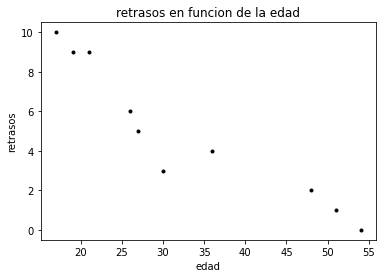

In [4]:
# Your code here.
import pylab as plt

plt.plot(age, tard, 'k.')
plt.xlabel('edad')
plt.ylabel('retrasos')
plt.title('retrasos en funcion de la edad');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
'''
    De acuerdo con la figura superior se puede apreciar a simple vista ue va a existir una relacion lineal inversamente proporcional entre las veces que una persona se retrasa y su edad.
'''

'\n    De acuerdo con la figura superior se puede apreciar a simple vista ue va a existir una relacion lineal inversamente proporcional entre las veces que una persona se retrasa y su edad.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
cor = dt1['age'].corr(dt1['tard'])
cov = dt1['age'].cov(dt1['tard'])
print(f'la covariancia entre las columnas de edad y retarasos es {cov}, mientras que la correlacion entre amas columnas es de  {cor}')

'''
    La covariancia es la correlacion sin normalizar. La correlacion nos indica que existe una clara dependencia inversamente lineal entre las edades y los retrasos 
'''

la covariancia entre las columnas de edad y retarasos es -45.56666666666666, mientras que la correlacion entre amas columnas es de  -0.9391626886887122


'\n    La covariancia es la correlacion sin normalizar. La correlacion nos indica que existe una clara dependencia inversamente lineal entre las edades y los retrasos \n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
from sklearn.linear_model import LinearRegression as LinReg

lr = LinReg()
lr.fit(np.array(age).reshape(-1,1), np.array(tard))
print(f'y = {lr.coef_[0]} x + {lr.intercept_}')

'''
    Dada la alta correlacion, se ha empleado un modelo de regrasion lineal, a partir del cual se ha calculado de recta de regresion
'''

y = -0.2428207709159808 x + 12.888803363135768


'\n    Dada la alta correlacion, se ha empleado un modelo de regrasion lineal, a partir del cual se ha calculado de recta de regresion\n'

Plot your regression model on your scatter plot.

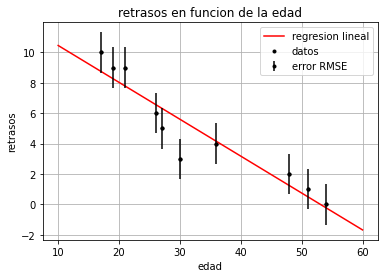

In [8]:
# Your code here.

#recta de regresion
x=np.linspace(10,60,1000)
y=lr.coef_[0]*x+lr.intercept_

#error
from sklearn.metrics import mean_squared_error as rms
y_pred = lr.predict(np.array(age).reshape(-1,1))
error = rms(np.array(tard), y_pred, squared=True)
err = np.array([error for i in range(10)])

#pintar
plt.plot(x,y,'r', label = 'regresion lineal')
plt.plot(age, tard, 'k.', label = 'datos')
plt.errorbar(np.array(age), np.array(tard), yerr=err, label = 'error RMSE', ecolor = 'k', fmt = 'k.')
plt.grid()
plt.xlabel('edad')
plt.ylabel('retrasos')
plt.legend()
plt.title('retrasos en funcion de la edad');


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
'''
    Como los datos  se ajustan bien a la recta (los puntos en conjunto con sus errores entran dentro de la linea de regresion lineal) se puede afirmar que es bastante preciso; 
    no obstante, se debe puntualizar que existe un outlayer en la edad de 30 años.
'''

'\n    Como los datos  se ajustan bien a la recta (los puntos en conjunto con sus errores entran dentro de la linea de regresion lineal) se puede afirmar que es bastante preciso; \n    no obstante, se debe puntualizar que existe un outlayer en la edad de 30 años.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
path = 'vehicles.csv'
dt2 = pd.read_csv(path)
dt2.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [79]:
# Your response here. 

dt3 = dt2[['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]

lst = [i for i in dt3.columns]

for i in lst:
    if i==j:
        pass
    elif  abs(dt3[i].corr(dt3[j]))>0.5 and abs(dt3[i].corr(dt3[j]))!=1:
        print(f'alta correlacion: {dt3[i].name} con {dt3[j].name} => corr = {dt3[i].corr(dt3[j])}')
        print('')
    else:
        pass

alta correlacion: Cylinders con CO2 Emission Grams/Mile => corr = 0.7523925537297486

alta correlacion: Fuel Barrels/Year con CO2 Emission Grams/Mile => corr = 0.9861886621428727

alta correlacion: Combined MPG con CO2 Emission Grams/Mile => corr = -0.9262290389336445

alta correlacion: Fuel Cost/Year con CO2 Emission Grams/Mile => corr = 0.9308651512201844



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [80]:
def rel(x,y):
    if str(x)==str(y):
        pass

    else:
        xxx=sm.add_constant(x)
        yyy=y
        modelo=sm.OLS(yyy, xxx).fit()
        print(modelo.summary())
        print('-------------------------------------------------------------------------------')

        cor = x.corr(y)
        print(f'correlacion = {cor}')

        lr = LinReg()
        lr.fit(np.array(x).reshape(-1,1), np.array(y))
        print(f'recta de regresion lineal: y = {lr.coef_[0]} x + {lr.intercept_}')

        #recta de regresion
        xx=np.linspace(min(x),max(x),1000)
        yy=lr.coef_[0]*xx+lr.intercept_

        #error
        y_pred = lr.predict(np.array(x).reshape(-1,1))
        error = rms(np.array(y), y_pred, squared=True)
        err = np.array([error for i in range(len(x))])

        #pintar
        plt.plot(xx,yy,'r', label = 'regresion lineal')
        plt.plot(x, y, 'k.', label = 'datos')
        #plt.errorbar(np.array(x), np.array(y), yerr=err, label = 'error RMSE', ecolor = 'k', fmt = 'k.')
        plt.grid()
        plt.xlabel(f'{str(x.name)} (U.A)')
        plt.ylabel(f'{str(y.name)} (U.A)')
        plt.legend()
        plt.title(f'{str(y.name)} vs {str(x.name)}');
        plt.show()
        print('-------------------------------------------------------------------------------')


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1869.
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:57:17   Log-Likelihood:            -2.2194e+05
No. Observations:                    35952   AIC:                         4.439e+05
Df Residuals:                        35950   BIC:                         4.439e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

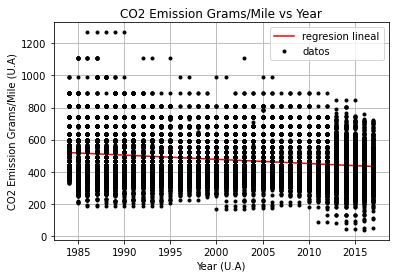

-------------------------------------------------------------------------------
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.566
Model:                                 OLS   Adj. R-squared:                  0.566
Method:                      Least Squares   F-statistic:                 4.690e+04
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:57:18   Log-Likelihood:            -2.0784e+05
No. Observations:                    35952   AIC:                         4.157e+05
Df Residuals:                        35950   BIC:                         4.157e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

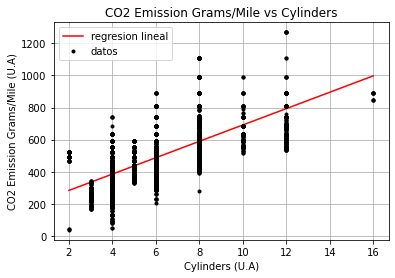

-------------------------------------------------------------------------------
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:57:18   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0

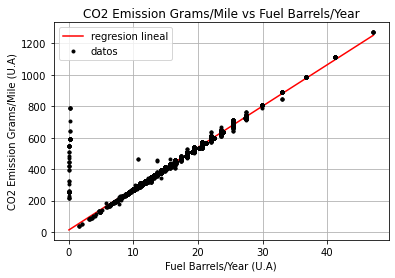

-------------------------------------------------------------------------------
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.858
Method:                      Least Squares   F-statistic:                 2.170e+05
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:57:19   Log-Likelihood:            -1.8778e+05
No. Observations:                    35952   AIC:                         3.756e+05
Df Residuals:                        35950   BIC:                         3.756e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]

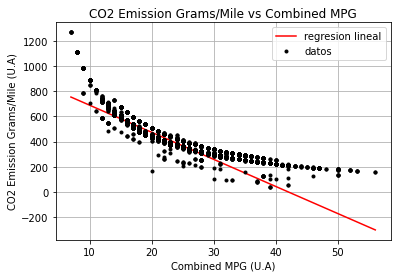

-------------------------------------------------------------------------------
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 2.334e+05
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:57:20   Log-Likelihood:            -1.8665e+05
No. Observations:                    35952   AIC:                         3.733e+05
Df Residuals:                        35950   BIC:                         3.733e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.97

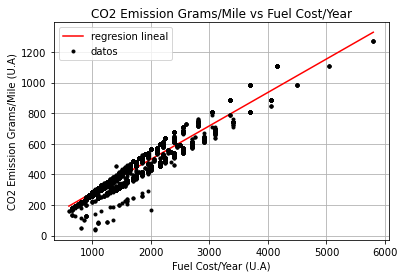

-------------------------------------------------------------------------------


In [82]:
for i in lst:
    rel(dt3[i], dt3['CO2 Emission Grams/Mile'])

In [77]:
# Your response here. 
'''
    He utilizado una regresion lineal
'''

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year', 'CO2 Emission Grams/Mile'],
      dtype='object')

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [78]:
# Your response here. 
x=sm.add_constant(dt3[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year']].apply(lambda x: x.fillna(x.mean()))

)

y=dt3['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             15:53:35   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [18]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [19]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [20]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [21]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [22]:
# Your response here. 